In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [3]:
train_df = pd.read_csv('train.csv')
pd.set_option('display.max_columns', None)

In [4]:
train_df.head()


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
del train_df['Unnamed: 0']


In [6]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [7]:
train_df.describe()


,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [8]:
train_df.shape


(103904, 24)

In [9]:
train_df.columns


Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [10]:
train_df.isna().sum() / len(train_df) * 100


id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minutes        

In [11]:
train_df.dropna(inplace=True)


In [12]:
train_df['id'].duplicated().sum()


0

In [13]:
del train_df['id']


<Axes: xlabel='satisfaction', ylabel='count'>

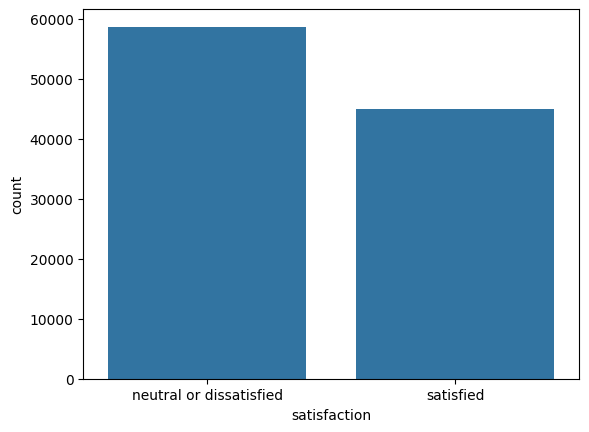

In [14]:
sns.countplot(train_df,x='satisfaction')


<Axes: xlabel='Age', ylabel='Count'>

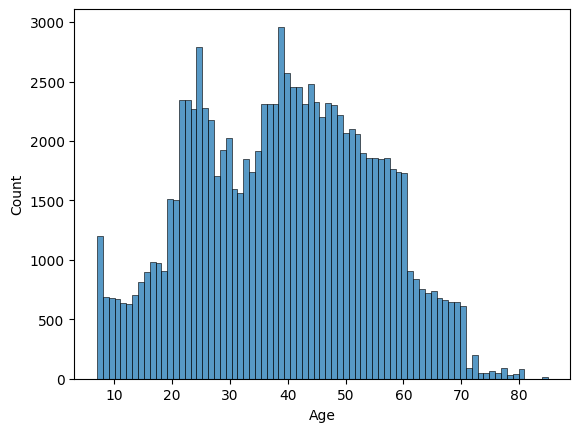

In [15]:
sns.histplot(data=train_df, x='Age')


<Axes: xlabel='Age', ylabel='Flight Distance'>

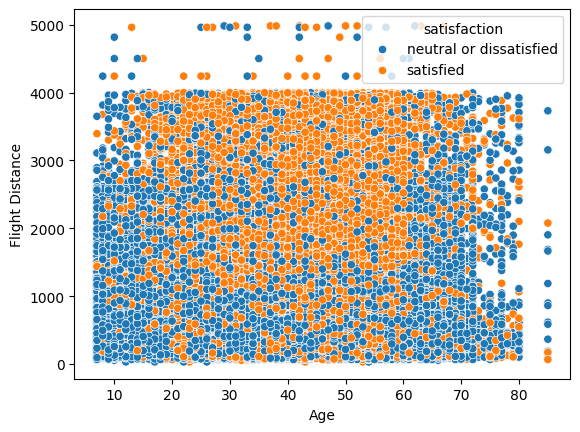

In [16]:
sns.scatterplot(train_df,x='Age',y='Flight Distance',hue='satisfaction')


<Axes: xlabel='Departure Delay in Minutes', ylabel='Arrival Delay in Minutes'>

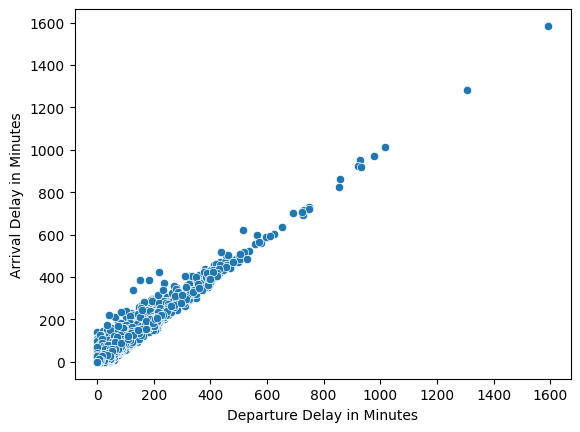

In [17]:
sns.scatterplot(train_df,x='Departure Delay in Minutes',y='Arrival Delay in Minutes')


<Axes: xlabel='Gender', ylabel='count'>

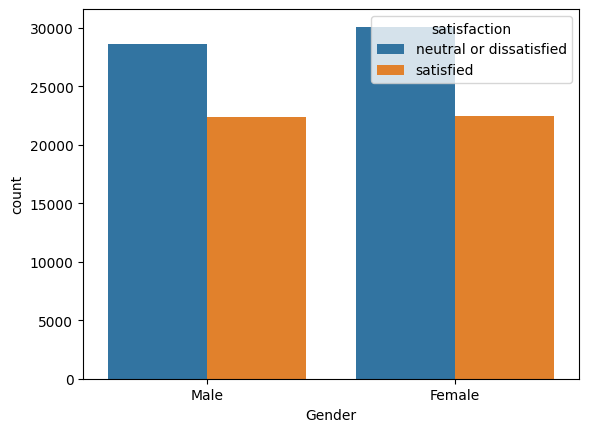

In [18]:
sns.countplot(train_df,x='Gender',hue='satisfaction')


In [19]:
count_df = train_df.groupby(['Class', 'Type of Travel']).size().reset_index(name='Count')
count_df.head()

,Class,Type of Travel,Count
0,Business,Business travel,47384
1,Business,Personal Travel,2149
2,Eco,Business travel,20202
3,Eco,Personal Travel,26391
4,Eco Plus,Business travel,3879


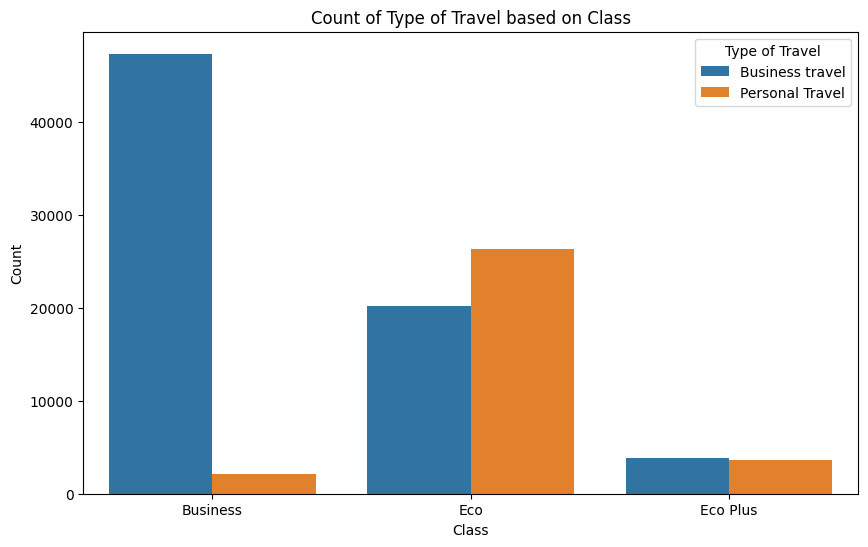

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Count', hue='Type of Travel', data=count_df)
plt.title('Count of Type of Travel based on Class')
plt.ylabel('Count')
plt.xlabel('Class')
plt.show()

<Axes: xlabel='Type of Travel', ylabel='count'>

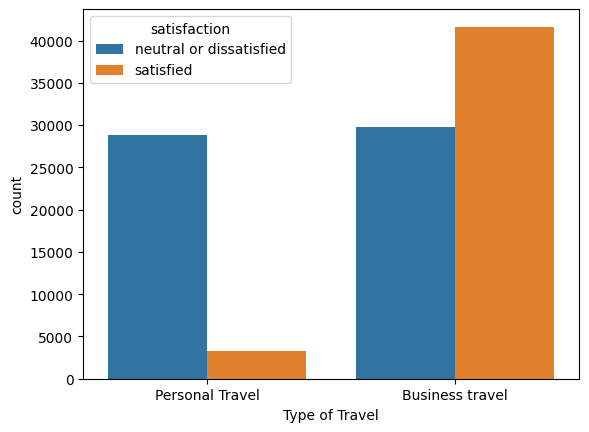

In [21]:
sns.countplot(train_df,x='Type of Travel',hue='satisfaction')


<Axes: xlabel='Class', ylabel='count'>

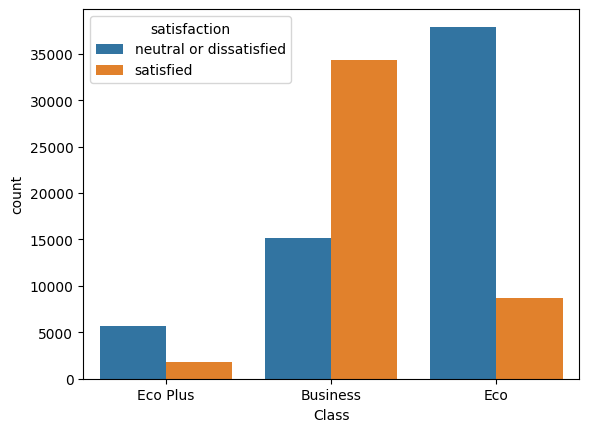

In [22]:
sns.countplot(train_df,x='Class',hue='satisfaction')


<Axes: xlabel='Customer Type', ylabel='count'>

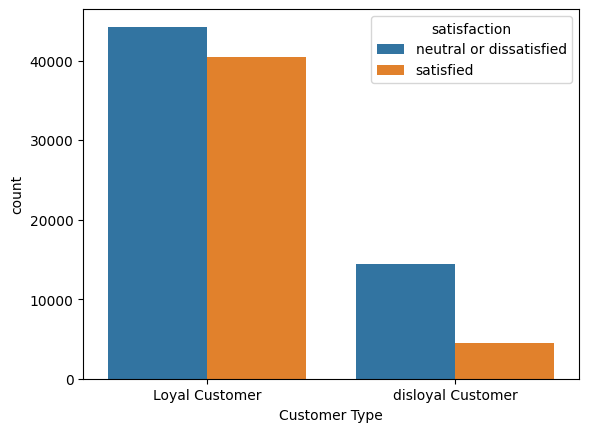

In [23]:
sns.countplot(train_df,x='Customer Type',hue='satisfaction')


In [24]:
train_df['Gender'] = train_df['Gender'].map({'Male':0,'Female':1})
train_df['Customer Type'] = train_df['Customer Type'].map({'disloyal Customer':0,'Loyal Customer':1})
train_df['Type of Travel'] = train_df['Type of Travel'].map({'Business travel':0,'Personal Travel':1})
train_df['Class'] = train_df['Class'].map({'Business':0,'Eco Plus':1,'Eco':2})

In [25]:
train_df['satisfaction'] = train_df['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})

In [26]:
correlation = train_df.corr()


<Axes: >

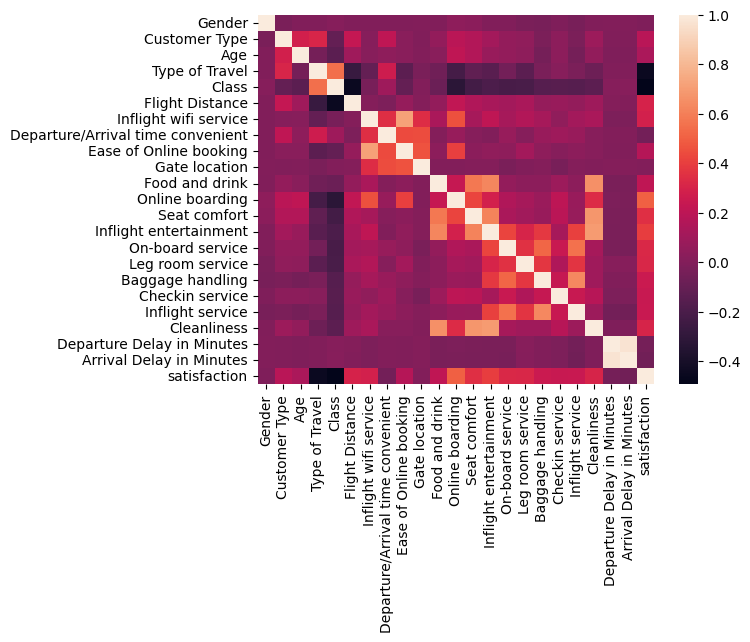

In [27]:
sns.heatmap(correlation)


In [28]:
test_df = pd.read_csv('test.csv')


In [29]:
test_df.head()


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [30]:
del test_df['Unnamed: 0']
del test_df['id']

In [31]:
test_df['Gender'] = test_df['Gender'].map({'Male':0,'Female':1})
test_df['Customer Type'] = test_df['Customer Type'].map({'disloyal Customer':0,'Loyal Customer':1})
test_df['Type of Travel'] = test_df['Type of Travel'].map({'Business travel':0,'Personal Travel':1})
test_df['Class'] = test_df['Class'].map({'Business':0,'Eco Plus':1,'Eco':2})

In [32]:
test_df.isna().sum()


Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [33]:
test_df.dropna(inplace=True)


In [34]:
test_df['satisfaction'] = test_df['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})

In [35]:
X_train,X_test,y_train,y_test = (train_df.drop('satisfaction',axis=1),
                                test_df.drop('satisfaction',axis=1),
                                train_df['satisfaction'],
                                test_df['satisfaction'])

In [36]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [37]:
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)
print(f'Train Accuracy={train_score} - Test Accuracy={test_score}')

Train Accuracy=0.9999903469312894 - Test Accuracy=0.9630402039161163
